In [1]:
#Working on applying Prophet to our datasets

#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet
import pickle






In [4]:
#Read in the data
df_utahpop = pd.read_csv('../Resources/utah population 2000-2022 neilsberg.csv')
mhpu_df = pd.read_csv('../Usefull Dataframes/Median_Home_Prices_Monthly_In_Thousands.csv')
df_ushpi = pd.read_csv('../Resources/Utah State House Price Index.csv')
with open('../Pop vs Build Permits/Resources/permits_df.pkl', 'rb') as f:
    permits_df = pickle.load(f)



display(mhpu_df.head())
display(df_ushpi.head())

#Analyze the data
display(df_utahpop.info())
display(df_utahpop.describe())
df_utahpop

display(permits_df.head())




,Date,Home Prices
0,2000-01-01,164.74
1,2000-02-01,164.83
2,2000-03-01,164.97
3,2000-04-01,165.33
4,2000-05-01,166.62


,DATE,UTSTHPI
0,1975-01-01,55.14
1,1975-04-01,58.70
2,1975-07-01,55.16
3,1975-10-01,59.90
4,1976-01-01,61.79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0                        24 non-null     object
 1   Population           23 non-null     object
 2   Year on Year Change  23 non-null     object
 3   Change in Percent    23 non-null     object
dtypes: object(4)
memory usage: 900.0+ bytes


None

,,Population,Year on Year Change,Change in Percent
count,24,23,23,23
unique,24,23,23,21
top,2000,"2,244,207",-,1.68%
freq,1,1,1,2


,DATE,UTBP1FH,Month on Month Change,Percent Change,Total Permits
144,2000-01-01,944.0,NaN,NaN,944.0
145,2000-02-01,1082.0,138.0,0.146186,2026.0
146,2000-03-01,1312.0,230.0,0.212569,3338.0
147,2000-04-01,1343.0,31.0,0.023628,4681.0
148,2000-05-01,1363.0,20.0,0.014892,6044.0


In [ ]:
#Transform/clean the data, if necessary

df_utahpop.rename(columns={' ':'Year'},inplace=True)
df_utahpop

df_utahpop.dropna(inplace=True)

df_utahpop.drop(df_utahpop.index[0], inplace=True)

#change column types to appropriate dtypes 

df_utahpop['Year'] = pd.to_datetime(df_utahpop['Year'], format='%Y')

columns_to_convert = ['Population', 'Year on Year Change']
for column in columns_to_convert:
    df_utahpop[column] = df_utahpop[column].str.replace(',', '').astype(int)

#set the index to the year column
df_utahpop.set_index('Year', inplace=True)

df_utahpop







,Population,Year on Year Change,Change in Percent
Year,,,
2001-01-01,2282415,38208,1.70%
2002-01-01,2322002,39587,1.73%
2003-01-01,2355755,33753,1.45%
2004-01-01,2395448,39693,1.68%
2005-01-01,2449105,53657,2.24%
2006-01-01,2513861,64756,2.64%
2007-01-01,2583023,69162,2.75%
2008-01-01,2644846,61823,2.39%
2009-01-01,2701062,56216,2.13%


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

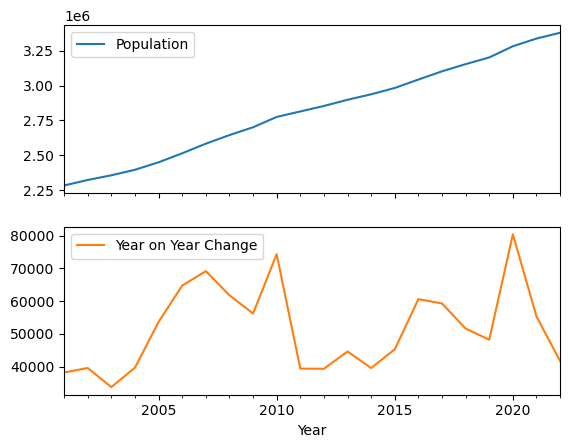

In [ ]:
#Plot Dataframes
df_utahpop.plot(subplots=True)

In [ ]:
#Prepare the data for Prophet
m = Prophet()
m
#Remove last two columns
df_utahpop = df_utahpop.iloc[:, :-2]
display(df_utahpop)

df_utahpop.reset_index(inplace=True)
prepped_utahpop_df = df_utahpop.rename(columns={'Year': 'ds', 'Population':'y'})


#Train the model
m.fit(prepped_utahpop_df)



,Population
Year,
2001-01-01,2282415
2002-01-01,2322002
2003-01-01,2355755
2004-01-01,2395448
2005-01-01,2449105
2006-01-01,2513861
2007-01-01,2583023
2008-01-01,2644846
2009-01-01,2701062


20:51:24 - cmdstanpy - INFO - Chain [1] start processing
20:51:24 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
#Make predictions

future_utahpop = m.make_future_dataframe(periods=5, freq="YS")
future_utahpop.tail(7)


,ds
20,2021-01-01
21,2022-01-01
22,2023-01-01
23,2024-01-01
24,2025-01-01
25,2026-01-01
26,2027-01-01


In [ ]:
#Make the predictions
future_utahpop = m.predict(future_utahpop)
future_utahpop.tail(7)





,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20,2021-01-01,1.336965e+06,3.326491e+06,3.337759e+06,1.336965e+06,1.336965e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,3.331848e+06
21,2022-01-01,1.394646e+06,3.381077e+06,3.392518e+06,1.394646e+06,1.394646e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,3.386706e+06
22,2023-01-01,1.452326e+06,3.438630e+06,3.451414e+06,1.449514e+06,1.454975e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,3.444922e+06
23,2024-01-01,1.510006e+06,3.495954e+06,3.517136e+06,1.501408e+06,1.518716e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,3.506605e+06
24,2025-01-01,1.567845e+06,3.545261e+06,3.580870e+06,1.551205e+06,1.584607e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,3.562727e+06
25,2026-01-01,1.625525e+06,3.591814e+06,3.646659e+06,1.599488e+06,1.652225e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,3.617585e+06
26,2027-01-01,1.683205e+06,3.638489e+06,3.715434e+06,1.646212e+06,1.722544e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,3.675802e+06


/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


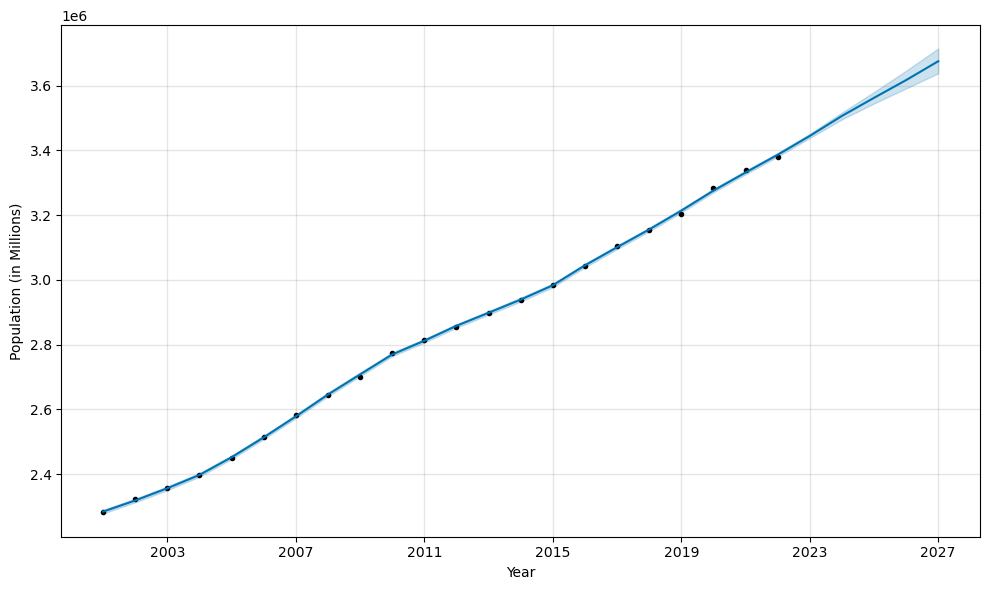

In [ ]:
#Plot the predictions
fig1 = m.plot(future_utahpop, xlabel='Year', ylabel='Population (in Millions)')

/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

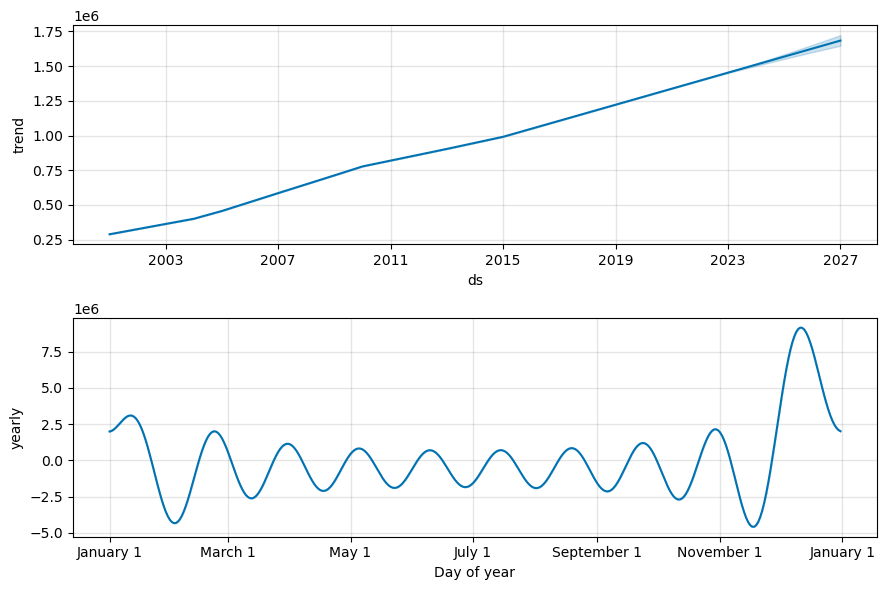

In [ ]:
#Evaluate the model

fig2 = m.plot_components(future_utahpop)




In [ ]:
future_utahpop

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,2.890699e+05,2.278071e+06,2.289147e+06,2.890699e+05,2.890699e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.283952e+06
1,2002-01-01,3.262721e+05,2.312719e+06,2.323896e+06,3.262721e+05,3.262721e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.318332e+06
2,2003-01-01,3.634742e+05,2.350050e+06,2.361756e+06,3.634742e+05,3.634742e+05,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,2.356070e+06
3,2004-01-01,4.006763e+05,2.391784e+06,2.402864e+06,4.006763e+05,4.006763e+05,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,2.397275e+06
4,2005-01-01,4.569700e+05,2.446270e+06,2.457546e+06,4.569700e+05,4.569700e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.451852e+06
5,2006-01-01,5.211935e+05,2.507994e+06,2.519029e+06,5.211935e+05,5.211935e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.513253e+06
6,2007-01-01,5.854170e+05,2.572548e+06,2.583786e+06,5.854170e+05,5.854170e+05,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,2.578013e+06
7,2008-01-01,6.491388e+05,2.640288e+06,2.651418e+06,6.491388e+05,6.491388e+05,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,2.645737e+06
8,2009-01-01,7.130353e+05,2.702389e+06,2.713764e+06,7.130353e+05,7.130353e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.707918e+06
9,2010-01-01,7.774712e+05,2.764166e+06,2.775169e+06,7.774712e+05,7.774712e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.769531e+06
